# PCA - Wine

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets import load_wine
wine = load_wine()
from sklearn.preprocessing import StandardScaler
wine_std = StandardScaler().fit_transform(wine.data)
df = pd.DataFrame(wine_std, columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [6]:
wine.data.shape

(178, 13)

### 1. 차원축소
- 13차원 -> 2차원, 4차원, 6차원

In [9]:
# 2차원
from sklearn.decomposition import PCA
pca2 = PCA(2)
wine_pca2 = pca2.fit_transform(wind_std)
wine_pca2[:3]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ]])

In [11]:
pca2.explained_variance_ratio_, pca2.explained_variance_ratio_.sum()

(array([0.36198848, 0.1920749 ]), 0.5540633835693534)

In [13]:
# 4차원
pca4 = PCA(4)
wine_pca4 = pca4.fit_transform(wind_std)
print(wine_pca4[:3])
pca4.explained_variance_ratio_, pca4.explained_variance_ratio_.sum()

[[ 3.31675081 -1.44346263 -0.16573904 -0.21563119]
 [ 2.20946492  0.33339289 -2.02645737 -0.29135832]
 [ 2.51674015 -1.0311513   0.98281867  0.72490231]]


(array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 ]), 0.735989990758993)

In [14]:
# 6차원
pca6 = PCA(6)
wine_pca6 = pca6.fit_transform(wind_std)
print(wine_pca6[:3])
pca6.explained_variance_ratio_, pca6.explained_variance_ratio_.sum()

[[ 3.31675081 -1.44346263 -0.16573904 -0.21563119  0.69304284 -0.22388013]
 [ 2.20946492  0.33339289 -2.02645737 -0.29135832 -0.25765463 -0.92712024]
 [ 2.51674015 -1.0311513   0.98281867  0.72490231 -0.25103312  0.54927605]]


(array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
        0.04935823]), 0.8509811607477046)

#### 2. PCA 전후 비교

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [17]:
# 원본 데이터로 분류
X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, stratify=wine.target, test_size=0.2,
    random_state=2022
)
rfc = RandomForestClassifier(random_state=2022)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

1.0

In [26]:
# 2, 4, 6차원으로 데이터 분류
list1 = [wine_pca2, wine_pca4, wine_pca6]
for n, i in enumerate(list1):
    X_train, X_test, y_train, y_test = train_test_split(
    i, wine.target, stratify=wine.target, test_size=0.2,
    random_state=2022
    )
    rfc = RandomForestClassifier(random_state=2022)
    rfc.fit(X_train, y_train)
    print(f'{(n+1)*2}차원:\t{rfc.score(X_test, y_test)}')

2차원:	1.0
4차원:	1.0
6차원:	1.0


3. 시각화

In [28]:
df1 = pd.DataFrame(wine_pca2, columns=['PC1', 'PC2'])
df1['target'] = wine.target
df1.head()

,PC1,PC2,target
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,0
4,1.008908,-0.869831,0


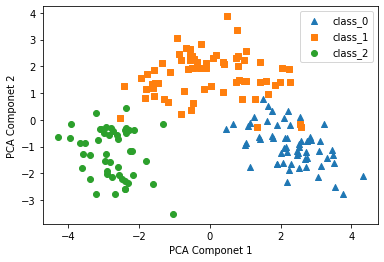

In [30]:
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_data = df1[df1.target == i]['PC1']
    y_data = df1[df1.target == i]['PC2']
    plt.scatter(x_data, y_data, marker=marker, label=wine.target_names[i])
plt.legend()
plt.xlabel('PCA Componet 1'), plt.ylabel('PCA Componet 2')
plt.show()

### 4. code refactoring

In [31]:
def pca_accuracy(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2,
    random_state=2022
    )
    rfc = RandomForestClassifier(random_state=2022)
    rfc.fit(X_train, y_train)
    score = rfc.score(X_test, y_test)
    return score

In [38]:
for n in [2, 4, 6]:
    pca = PCA(n_components=n)
    wine_pca = pca.fit_transform(wine_std)
    explained = pca.explained_variance_ratio_.sum()
    acc = pca_accuracy(wine_pca, wine.target)
    print(f'{n}차원 축소 설명력:{explained:.4f}\t정확도:{acc}')

2차원 축소 설명력:0.5541	정확도:1.0
4차원 축소 설명력:0.7360	정확도:1.0
6차원 축소 설명력:0.8510	정확도:1.0
